In [29]:
from keras.models import model_from_json
from keras_preprocessing.image import load_img
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

import numpy as np
from PIL import Image
import os
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, precision_recall_fscore_support,
    roc_auc_score, roc_curve)
import matplotlib.pyplot as plt

In [2]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [3]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [4]:
def ef(image):
    img = load_img(image,color_mode = "grayscale" )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [5]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
model prediction is  sad


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
model prediction is  disgust


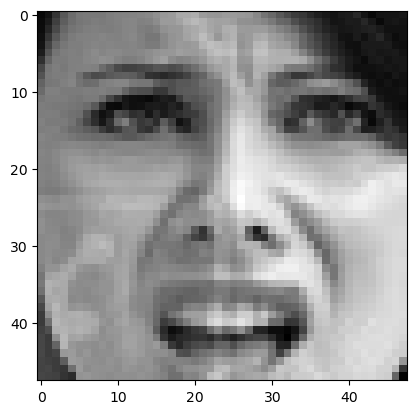

In [7]:
image = 'images/test/disgust/533.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
model prediction is  angry


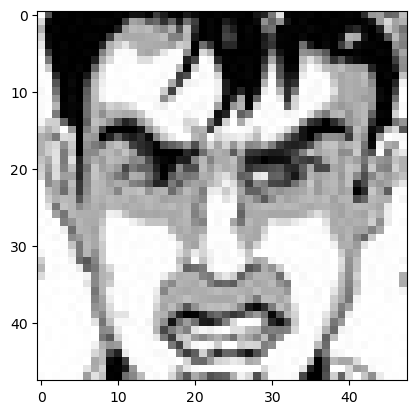

In [8]:
image = 'images/test/angry/38.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
model prediction is  fear


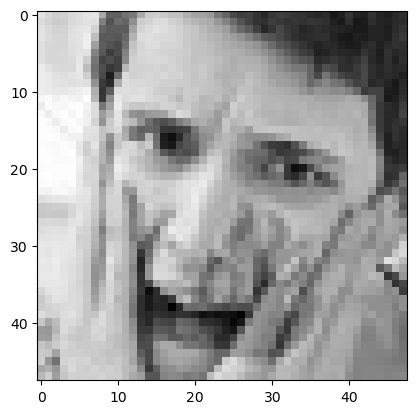

In [9]:
image = 'images/test/fear/73.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
model prediction is  happy


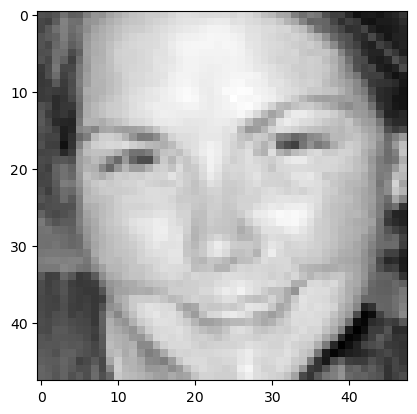

In [10]:
image = 'images/test/happy/8.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
model prediction is  neutral


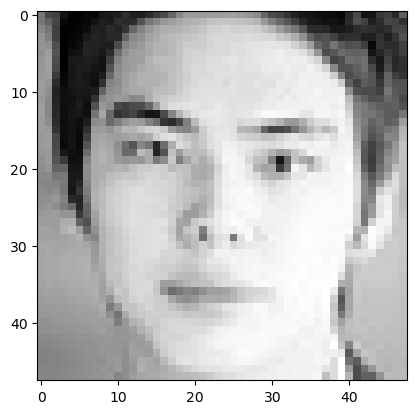

In [11]:
image = 'images/test/neutral/112.jpg'
print("original image is of neutral")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
model prediction is  sad


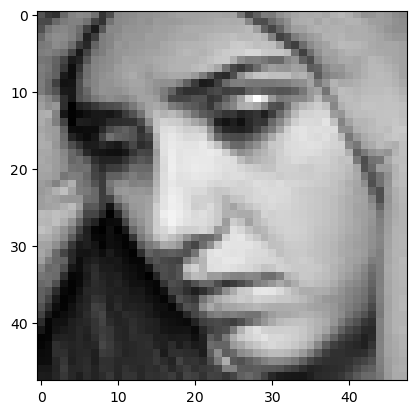

In [12]:
image = 'images/test/sad/231.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
model prediction is  neutral


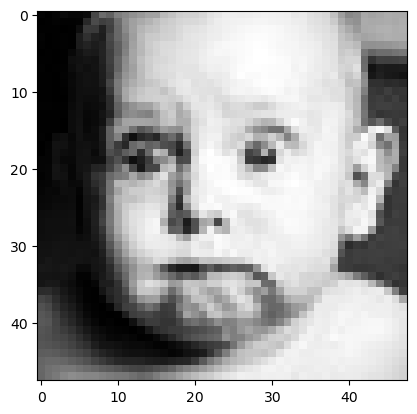

In [13]:
image = 'images/test/surprise/51.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

X_test shape: (7066, 48, 48, 1)
y_test shape: (7066,)
221/221 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step


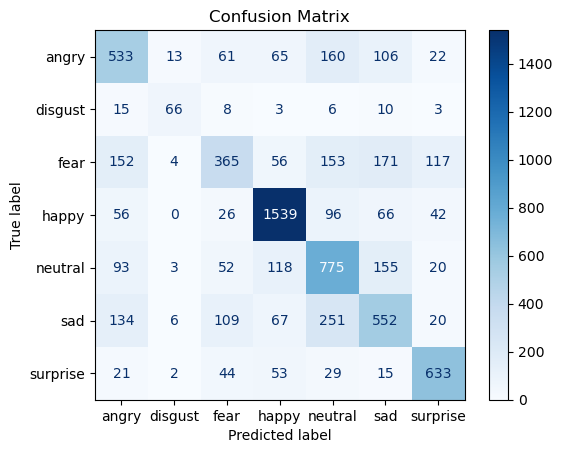

In [30]:
# Define the paths to your test data
TEST_DIR = 'images/test'
labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
label_to_index = {label: idx for idx, label in enumerate(labels)}

# Load and preprocess test images and labels
def load_and_preprocess_test_data(test_dir, label_to_index):
    images = []
    true_labels = []
    for label in os.listdir(test_dir):
        label_path = os.path.join(test_dir, label)
        if not os.path.isdir(label_path):
            continue
        label_index = label_to_index.get(label)
        for img_name in os.listdir(label_path):
            img_path = os.path.join(label_path, img_name)
            try:
                img = Image.open(img_path).convert('L')  # Load as grayscale
                img = img.resize((48, 48))  # Resize to 48x48
                img = np.array(img).astype('float32') / 255.0  # Normalize to [0, 1]
                img = np.expand_dims(img, axis=-1)  # Add channel dimension
                images.append(img)
                true_labels.append(label_index)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
                continue  # Skip any failed reads
    return np.array(images), np.array(true_labels)

# Load and preprocess test data
X_test, y_test = load_and_preprocess_test_data(TEST_DIR, label_to_index)

# Check the shapes
print("X_test shape:", X_test.shape)  # Should be (num_samples, 48, 48, 1)
print("y_test shape:", y_test.shape)  # Should be (num_samples,)

# Make predictions for the entire test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [31]:
# Compute Precision, Recall, F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None, labels=np.arange(len(labels)))

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=labels))


Classification Report:

              precision    recall  f1-score   support

       angry       0.53      0.56      0.54       960
     disgust       0.70      0.59      0.64       111
        fear       0.55      0.36      0.43      1018
       happy       0.81      0.84      0.83      1825
     neutral       0.53      0.64      0.58      1216
         sad       0.51      0.48      0.50      1139
    surprise       0.74      0.79      0.77       797

    accuracy                           0.63      7066
   macro avg       0.62      0.61      0.61      7066
weighted avg       0.63      0.63      0.63      7066



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

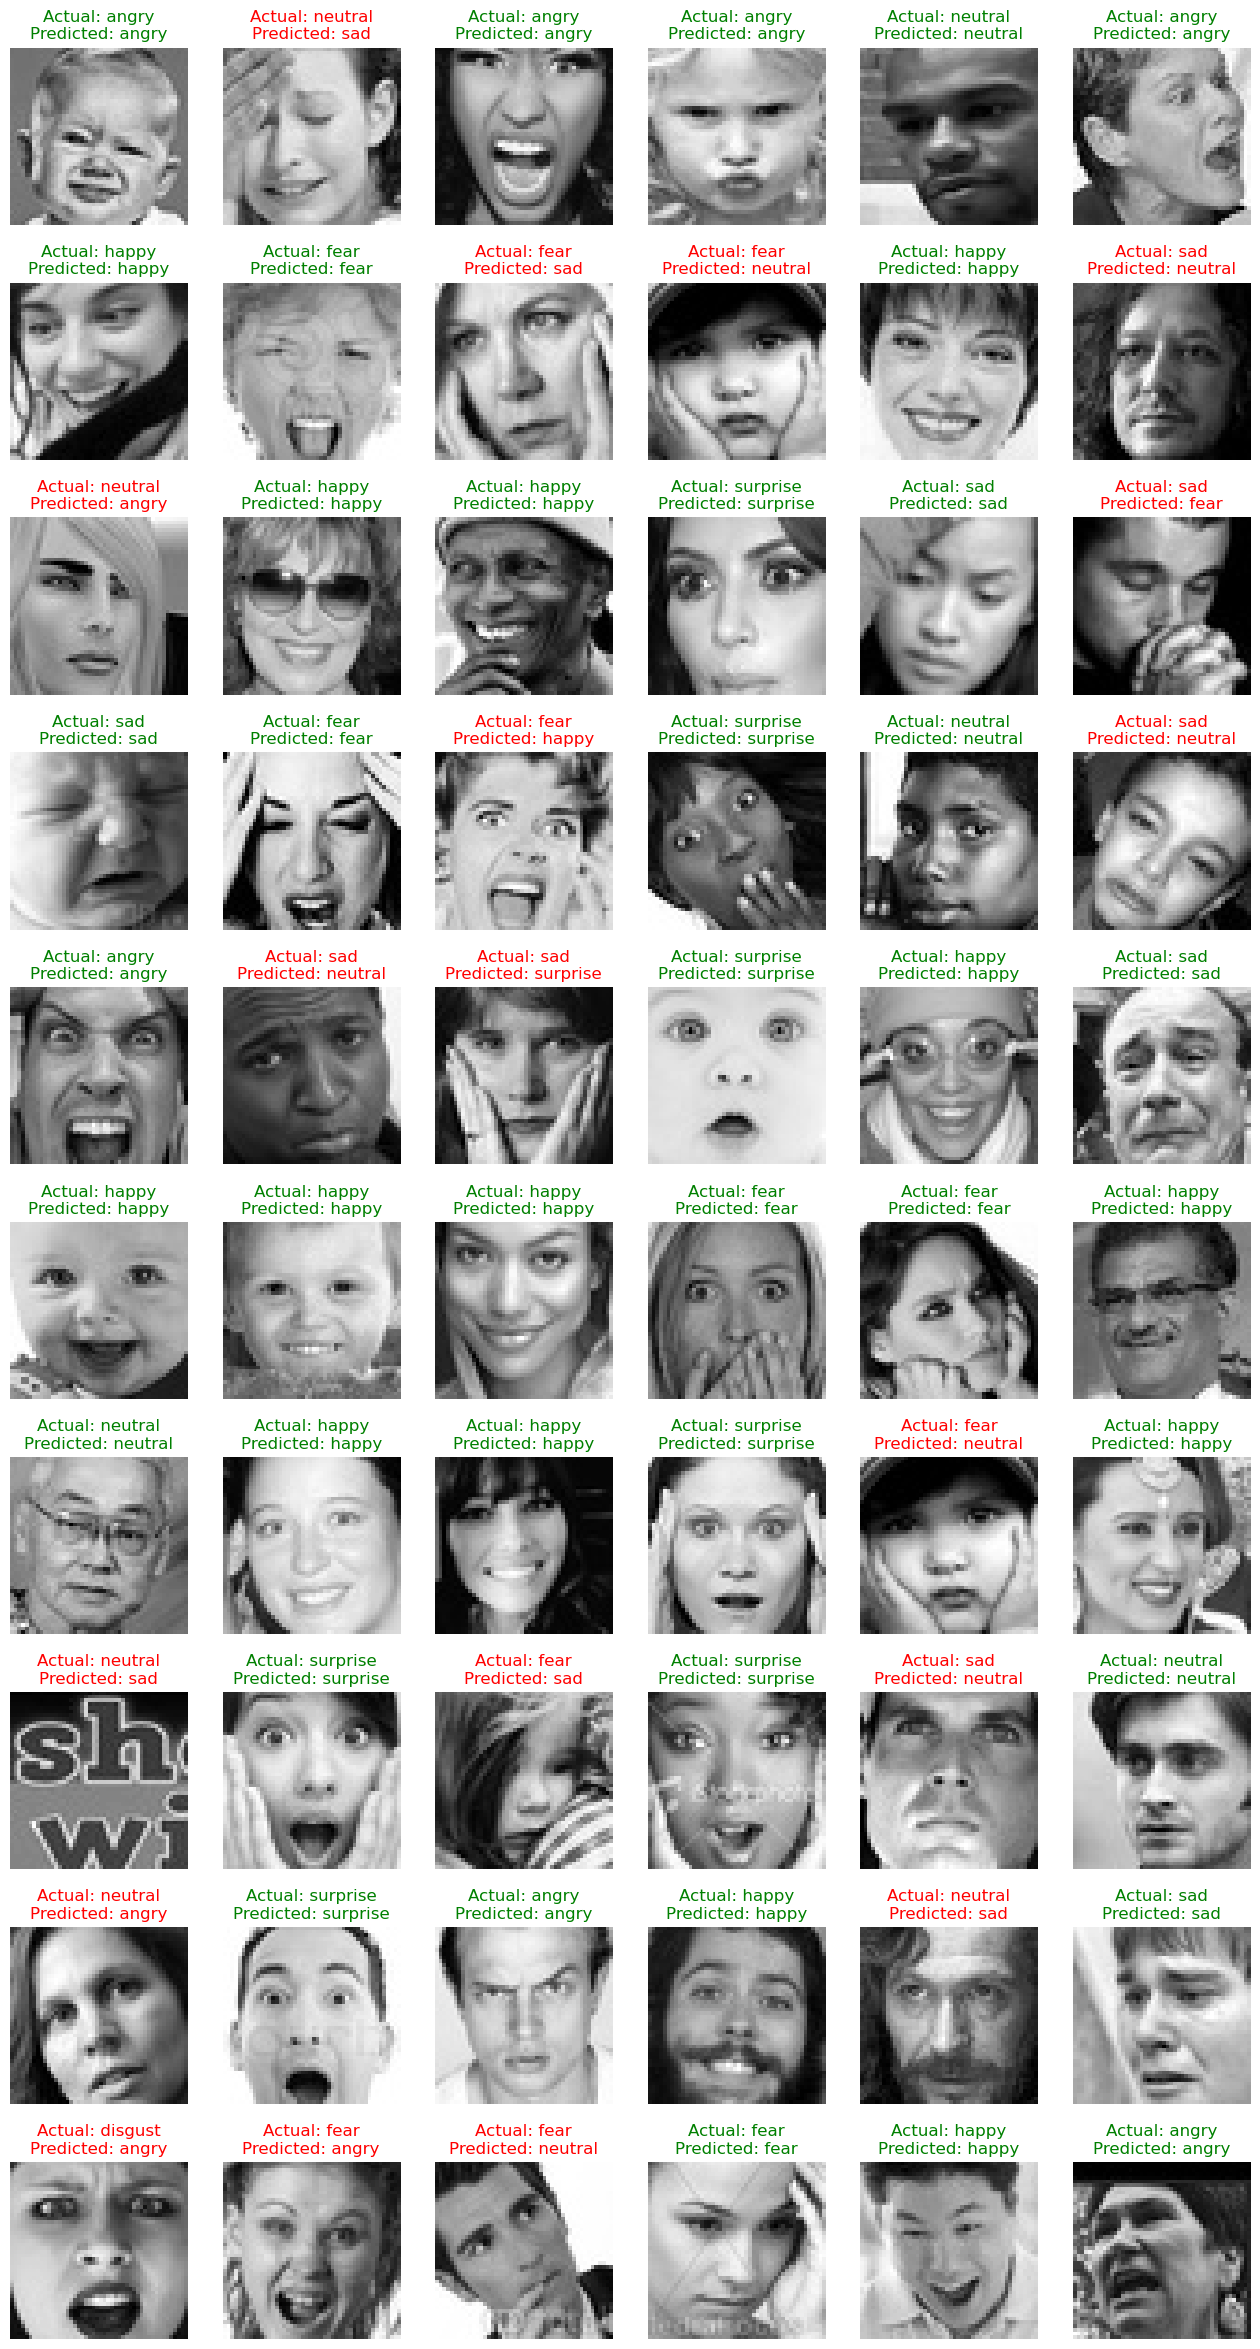

In [19]:
plt.figure(figsize=(16, 30))
j = 1
random_indices = np.random.randint(0, len(X_test), 60)
for i in random_indices:
    plt.subplot(10, 6, j)
    j += 1
    plt.imshow(X_test[i].reshape(48, 48), cmap='gray')
    y_pred_single = model.predict(np.expand_dims(X_test[i], axis=0))  # Get prediction for single image
    predicted_index = np.argmax(y_pred_single)
    actual_label = labels[y_test[i]]
    predicted_label = labels[predicted_index]
    
    if actual_label == predicted_label:
        color = "green"
    else:
        color = "red"

    plt.title(f'Actual: {actual_label}\nPredicted: {predicted_label}', color=color)
    plt.axis('off')

plt.show()

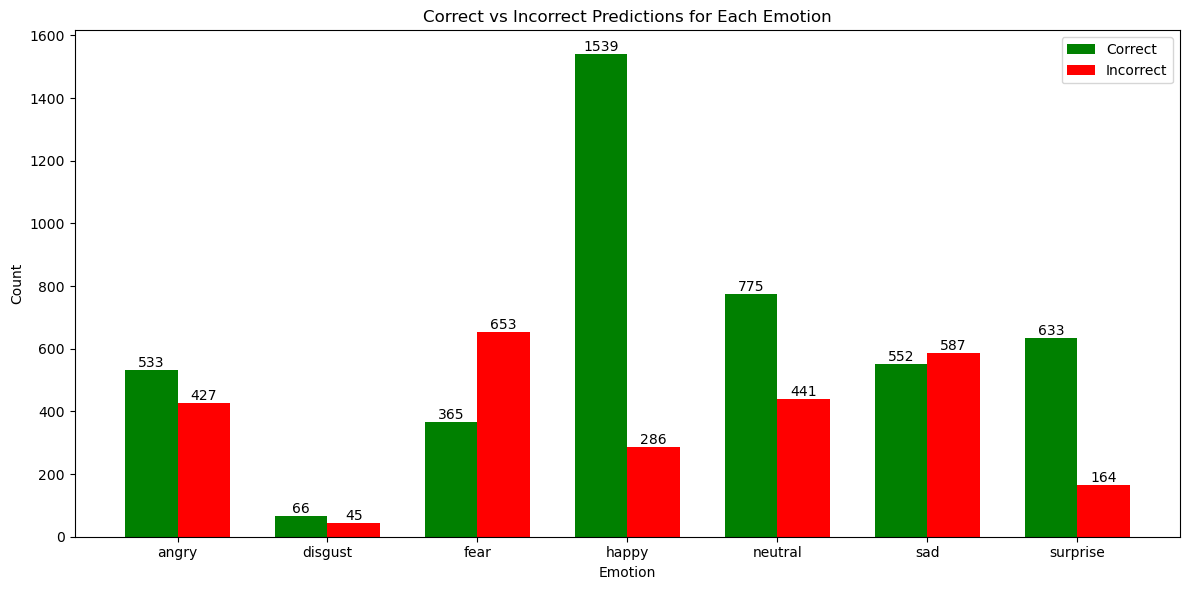

In [26]:
# Calculate the number of correct and incorrect predictions for each class
correct_counts = np.zeros(len(labels), dtype=int)
incorrect_counts = np.zeros(len(labels), dtype=int)

for true_label, pred_label in zip(y_test, y_pred):
    if true_label == pred_label:
        correct_counts[true_label] += 1
    else:
        incorrect_counts[true_label] += 1

# Plot the results
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(labels))

bar1 = plt.bar(index, correct_counts, bar_width, color='g', label='Correct')
bar2 = plt.bar(index + bar_width, incorrect_counts, bar_width, color='r', label='Incorrect')

plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Correct vs Incorrect Predictions for Each Emotion')
plt.xticks(index + bar_width / 2, labels)
plt.legend()

for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, '%d' % int(height), ha='center', va='bottom')
for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.tight_layout()
plt.show()